In [1]:
# This project is to predict a stroke value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df= pd.read_csv("C:\\Users\\Simmy\\Downloads\\stroke.csv")

In [3]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.shape

(5110, 12)

In [7]:
df.isnull().sum().any()

True

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
bmi_mean = df["bmi"].mean()
df['bmi'].fillna(value=bmi_mean,inplace=True)

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# we dont need ID column
df.drop('id', axis=1, inplace= True)

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:xlabel='age', ylabel='Density'>

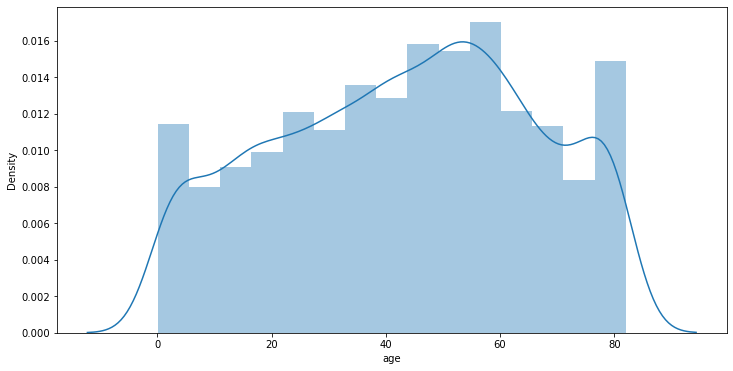

In [13]:
# Now let's do some EDA to understand our data more

plt.figure(figsize=(12,6))
sns.distplot(df['age'],bins=15)

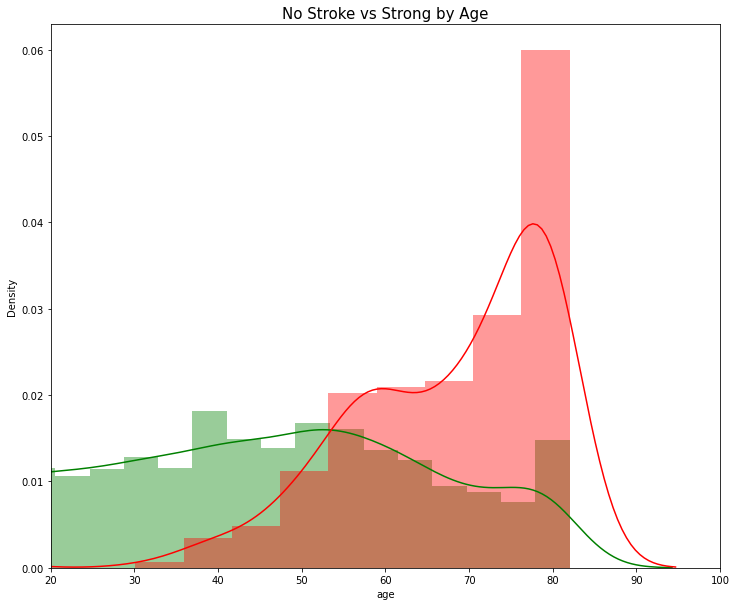

In [14]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke']== 0]["age"], color='green')
sns.distplot(df[df['stroke']== 1]["age"], color= 'red')

plt.title('No Stroke vs Strong by Age', fontsize=15)
plt.xlim([20,100])
plt.show()


<AxesSubplot:xlabel='gender', ylabel='count'>

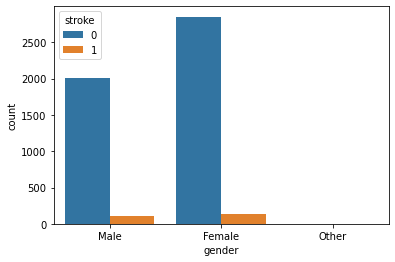

In [15]:
sns.countplot(x='gender',data=df, hue='stroke')

In [16]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
df.drop(df.loc[df['gender']=='Other'].index,inplace=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

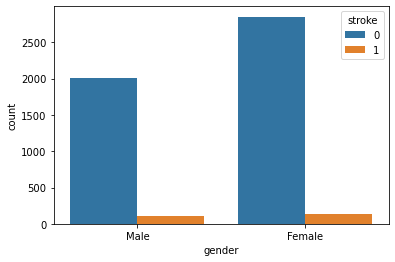

In [18]:
sns.countplot(x = 'gender', data=df,hue='stroke')

0    4860
1     249
Name: stroke, dtype: int64

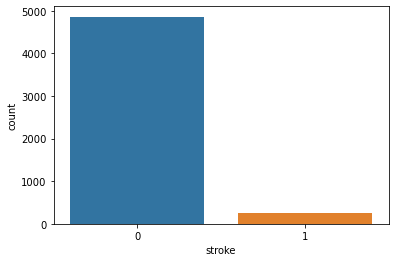

In [19]:
sns.countplot(x='stroke', data=df)
df.stroke.value_counts()

In [20]:
# hugely class imbalance

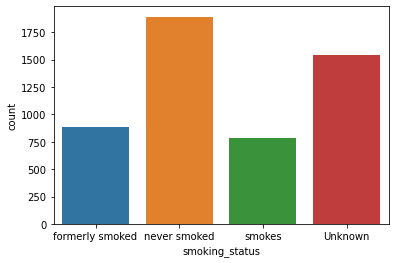

In [21]:
sns.countplot(x='smoking_status', data=df);

<AxesSubplot:xlabel='work_type', ylabel='count'>

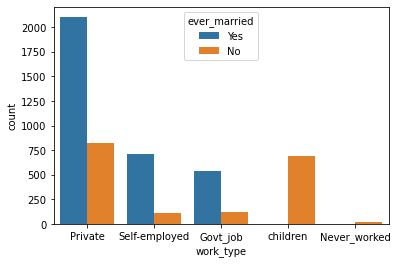

In [22]:
sns.countplot(x='work_type', hue='ever_married', data=df)

In [23]:
# Data Preprocessing
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [24]:
# Label Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [25]:
l_e = LabelEncoder()
X[:,0] = l_e.fit_transform(X[:, 0]) # gender column
X[:,4] = l_e.fit_transform(X[:,4]) # ever_married column
X[:,6] = l_e.fit_transform(X[:,6]) # Residence_type column

In [26]:
c_t = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [5,9])], remainder = 'passthrough')
X = np.array(c_t.fit_transform(X))

In [27]:
#Split the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)


In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3831, 17), (3831,), (1278, 17), (1278,))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
                              

In [30]:
# Unsampling the data


In [31]:
print (sum(y_train == 1))
print (sum(y_train == 0))

169
3662


In [33]:
from imblearn.over_sampling import SMOTE # smote is useful for class imbalance problem


In [34]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train.ravel())

In [35]:
print (X_train.shape)
print (y_train.shape)
print (sum(y_train == 1))
print (sum(y_train == 0))

(7324, 17)
(7324,)
3662
3662


In [36]:
# Now our data is balanced nicely

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(model, X_train, y_train, cv = 6)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print ('train score of LogisticRegression is', score.mean(),'%')
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)

train score of LogisticRegression is 0.7972456062619998 %
--
Precision score is  0.16285714285714287
--
ROC Score is 0.7339628547579299
--
Recall Score is  0.7125
